In [1]:
import pandas as pd
import numpy as np
import os
import glob 

In [23]:
# Set paths
# Working from the Scripts folder as the base path
exercise_path = '../Python/Exercise Files/Pandas Course Resources/Pandas Course Resources/retail/'
#glob.glob("../**/", recursive=True)

# Read in the data and adjust the column names to Date, Store_Number and Transaction_Count
transactions = (pd.read_csv(os.path.join(exercise_path, "transactions.csv"),
                           parse_dates=["Date"],
                           names = ["Date", "Store_Number", "Transaction_Count"],
                           header = 0, #to give our data frame custom names, set this to 0
                           skiprows = [0], # Skipping the 1st row, so we don't get that odd first entry
                           dtype ={"Store_Number":"Int8", "Transaction_Count": "Int16"}
                           )
    .assign(target_pct = lambda x: x["Transaction_Count"] / 2500, 
            met_target = lambda x: x["target_pct"]>= 1,
            bonus_payable = lambda x: x["met_target"] * 100,
            #bonus_payable2 = lambda x: (x["Transaction_Count"] / 2500 >= 1*100),
            month = lambda x: x["Date"].dt.month,
            day_of_week = lambda x: x["Date"].dt.dayofweek)
    .astype({
        "target_pct": "Float32",
        "month": "Int8",
        "day_of_week": "Int8"
    })
)
transactions.head()

,Date,Store_Number,Transaction_Count,target_pct,met_target,bonus_payable,month,day_of_week
0,2013-01-02,1,2111,0.8444,False,0,1,2
1,2013-01-02,2,2358,0.9432,False,0,1,2
2,2013-01-02,3,3487,1.3948,True,100,1,2
3,2013-01-02,4,1922,0.7688,False,0,1,2
4,2013-01-02,5,1903,0.7612,False,0,1,2


In [35]:
# Write the data to an Excel sheet, where each tab is a years of data
years = transactions["Date"].dt.year.unique()
for x in years: print({x})

with pd.ExcelWriter("tmp.xlsx") as writer:
    for year in range(2013, 2018):
        transactions.loc[transactions["Date"].dt.year == year].to_excel(
            writer, sheet_name = str(year)
        )
        



{np.int32(2013)}
{np.int32(2014)}
{np.int32(2015)}
{np.int32(2016)}
{np.int32(2017)}


In [48]:
for x in range(1, 13): print(x)

1
2
3
4
5
6
7
8
9
10
11
12


In [ ]:
# Importing from SQL
from sqlalchemy import create_engine, inspect
engine = create_engine("sqlite:///../database_name.sqllite")
inspect(engine).get_table_names() # to view the tables in DB

In [68]:
import janitor

url = 'https://en.wikipedia.org/wiki/List_of_U.S._states_and_territories_by_GDP'
gdp = pd.read_html(url)[0].clean_names()
#gdp = gdp.rename(columns=lambda x: x.strip('()'))
gdp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 10 columns):
 #   Column                                               Non-Null Count  Dtype 
---  ------                                               --------------  ----- 
 0   state_or_federal_district                            52 non-null     object
 1   2022                                                 52 non-null     int64 
 2   2024                                                 52 non-null     int64 
 3   annual_gdp_change_at_current_prices_2023–2024_[1]    52 non-null     int64 
 4   annual_gdp_change_at_current_prices_2023–2024_[1]_1  52 non-null     object
 5   real_gdp_growth_rate_2023–2024_[1]                   52 non-null     object
 6   2022                                                 52 non-null     object
 7   2024                                                 52 non-null     object
 8   2022                                                 52 non-null     object
 9   2

In [80]:
# Read in the 2014 and 2015 data from the tmp.xlsx file and concatenate them

#df_1 = pd.read_excel("tmp.xlsx", sheet_name = "2014")
#df_2 = pd.read_excel("tmp.xlsx", sheet_name = "2015")

def read_sheets(x):
        y = pd.read_excel("tmp.xlsx", sheet_name = str(x))
        return y

df_1 = read_sheets(2014)
df_2 = read_sheets(2015)

print(f"{df_1.info()}, {df_2.info()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17138 entries, 0 to 17137
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Unnamed: 0         17138 non-null  int64         
 1   Date               17138 non-null  datetime64[ns]
 2   Store_Number       17138 non-null  int64         
 3   Transaction_Count  17138 non-null  int64         
 4   target_pct         17138 non-null  float64       
 5   met_target         17138 non-null  bool          
 6   bonus_payable      17138 non-null  int64         
 7   month              17138 non-null  int64         
 8   day_of_week        17138 non-null  int64         
dtypes: bool(1), datetime64[ns](1), float64(1), int64(6)
memory usage: 1.1 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18346 entries, 0 to 18345
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  ----- 

In [ ]:
# Bind the two data frames together
pd.concat([df_1, df_2], ignore_index=True).reset_index()


,index,Unnamed: 0,Date,Store_Number,Transaction_Count,target_pct,met_target,bonus_payable,month,day_of_week
0,0,16907,2014-01-01,25,840,0.3360,False,0,1,2
1,1,16908,2014-01-01,36,487,0.1948,False,0,1,2
2,2,16909,2014-01-02,1,1875,0.7500,False,0,1,3
3,3,16910,2014-01-02,2,2122,0.8488,False,0,1,3
4,4,16911,2014-01-02,3,3350,1.3400,True,100,1,3
...,...,...,...,...,...,...,...,...,...,...
35479,35479,52386,2015-12-31,49,3828,1.5312,True,100,12,3
35480,35480,52387,2015-12-31,50,2948,1.1792,True,100,12,3
35481,35481,52388,2015-12-31,51,2892,1.1568,True,100,12,3
35482,35482,52389,2015-12-31,53,2300,0.9200,False,0,12,3


In [ ]:
# Merging data, join retail.csv with stores.csv
retail_df = pd.read_csv(os.path.join(exercise_path, "retail_2016_2017.csv"), parse_dates=["date"])
stores_df = pd.read_csv(os.path.join(exercise_path, "stores.csv"))

print(f"{retail_df.info()}, {stores_df.info()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1054944 entries, 0 to 1054943
Data columns (total 6 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   id           1054944 non-null  int64         
 1   date         1054944 non-null  datetime64[ns]
 2   store_nbr    1054944 non-null  int64         
 3   family       1054944 non-null  object        
 4   sales        1054944 non-null  float64       
 5   onpromotion  1054944 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 48.3+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   store_nbr  54 non-null     int64 
 1   city       54 non-null     object
 2   state      54 non-null     object
 3   type       54 non-null     object
 4   cluster    54 non-null     int64 
dtypes: int64(2), objec

In [85]:
df_join = retail_df.merge(stores_df,
                          how = "left",
                          left_on = "store_nbr",
                          right_on = "store_nbr")
df_join.head()

,id,date,store_nbr,family,sales,onpromotion,city,state,type,cluster
0,1945944,2016-01-01,1,AUTOMOTIVE,0.0,0,Quito,Pichincha,D,13
1,1945945,2016-01-01,1,BABY CARE,0.0,0,Quito,Pichincha,D,13
2,1945946,2016-01-01,1,BEAUTY,0.0,0,Quito,Pichincha,D,13
3,1945947,2016-01-01,1,BEVERAGES,0.0,0,Quito,Pichincha,D,13
4,1945948,2016-01-01,1,BOOKS,0.0,0,Quito,Pichincha,D,13


<Axes: xlabel='city'>

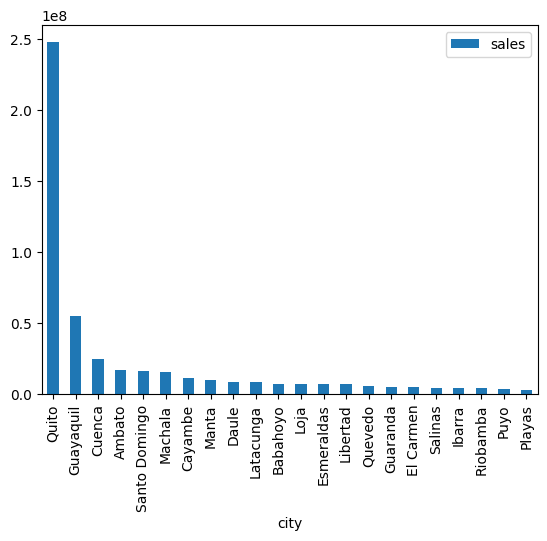

In [89]:
# Plot total sales by city
df_join.groupby("city").agg({"sales":"sum"}).sort_values("sales", ascending=False).plot.bar()

<Axes: xlabel='date'>

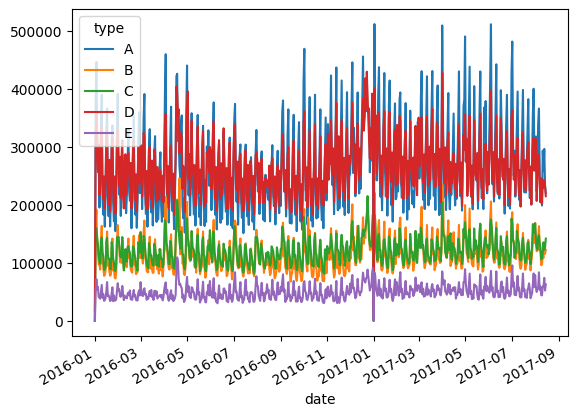

In [ ]:
# sum of sales by type
(df_join.groupby(["date", "type"])
    .agg({"sales":"sum"})
    .reset_index()
    .pivot_table(index  = "date", columns = "type", values = "sales", aggfunc= "mean")
    .plot()
)

<Axes: xlabel='date'>

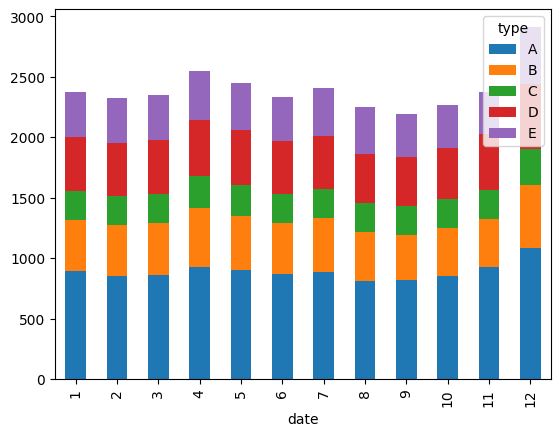

In [105]:
(df_join.groupby([df_join["date"].dt.month, "type"])
    .agg({"sales":"mean"})
    .reset_index()
    .pivot_table(index  = "date", columns = "type", values = "sales", aggfunc= "mean")
    .plot(kind = 'bar', stacked = True)
)

In [ ]:
 c("#15478A", "#5BB5D5", "#8C8C91", "#E14BA1","#3B5BBE", "#F9C555","#419164", "#876EC4", "#F36428"),